In [90]:
import os
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score, f1_score, classification_report
from scipy.stats import norm
from itertools import cycle
from random import shuffle
from sklearn.model_selection import train_test_split


import torch
from torch import nn
import torch.optim as opt
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision import transforms
from livelossplot import PlotLosses
from mpl_toolkits.axes_grid1 import ImageGrid
from collections import OrderedDict

from sprites import Sprites
from cycle_consistent_vae import Encoder, Decoder

np.random.bit_generator = np.random._bit_generator

In [91]:
cuda = 1
device = torch.device("cuda:{}".format(cuda) if torch.cuda.is_available() else "cpu")

MODEL_PATH = "./models/cycle_vae_06052020-030456_99.pth"
checkpoint = torch.load(MODEL_PATH)

Z_DIM = 16 #Style Dimension (Unspecified)
S_DIM = 16 # Class Dimension (Specified)

encoder = Encoder(style_dim=Z_DIM, class_dim=S_DIM)
encoder.load_state_dict(checkpoint['encoder'])

decoder = Decoder(style_dim=Z_DIM, class_dim=S_DIM)
decoder.load_state_dict(checkpoint['decoder'])


encoder.to(device)
encoder.eval()

Encoder(
  (conv_model): Sequential(
    (conv_1): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_1): ReLU(inplace)
    (conv_2): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (bn_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_2): ReLU(inplace)
    (conv_3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (bn_3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_3): ReLU(inplace)
    (conv_4): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (bn_4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu_4): ReLU(inplace)
  )
  (style_mu): Linear(in_features=512, out_features=16, bias=True)
  (style_logvar): Linear(in_features=512, out_features=16, bias=True)
  (class_output): Line

In [92]:
decoder.to(device)
decoder.eval()

Decoder(
  (style_input): Sequential(
    (0): Linear(in_features=16, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (class_input): Sequential(
    (0): Linear(in_features=16, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace)
  )
  (deconv_model): Sequential(
    (deconv_1): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(2, 2))
    (de_bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leakyrelu_1): LeakyReLU(negative_slope=0.2, inplace)
    (deconv_2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2))
    (de_bn_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leakyrelu_2): LeakyReLU(negative_slope=0.2, inplace)
    (deconv_3): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2))
    (de_bn_3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leakyrelu_3): LeakyReLU(negative_slope=0.2, i

In [93]:
def reparameterize(training, mu, logvar):
    if training:
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu
    else:
        return mu

In [94]:
def imshow_grid(images, shape=[2, 8], name='default', save=False):
    """
    Plot images in a grid of a given shape.
    Initial code from: https://github.com/pumpikano/tf-dann/blob/master/utils.py
    """
    fig = plt.figure(1)
    grid = ImageGrid(fig, 111, nrows_ncols=shape, axes_pad=0.05)

    size = shape[0] * shape[1]
    for i in range(size):
        grid[i].axis('off')
        grid[i].imshow(images[i])  # The AxesGrid object work as a list of axes.

    if save:
        plt.savefig('./test_images/' + str(name) + '.png')
        plt.clf()
    else:
        plt.show()

# Dataset processing

In [95]:
BATCH_SIZE = 16
test_data = Sprites()
train_loader = cycle(DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=2, drop_last=True))

# Style tranfer grid

### Making a 9x9 grid

In [96]:
epoch=0

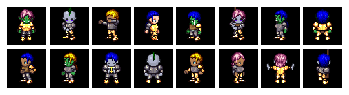

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

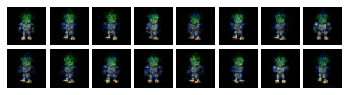

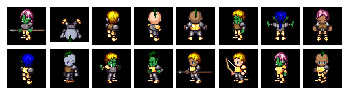

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

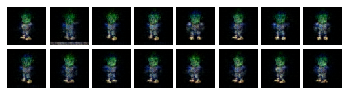

In [97]:
elem1 = next(train_loader)
image_batch_1 = elem1['img1'].to(device)
image_batch_1 = torch.transpose(image_batch_1, 2,3)
image_batch_1 = torch.transpose(image_batch_1, 1,2)

image_batch_2 = elem1['img2'].to(device)
image_batch_2 = torch.transpose(image_batch_2, 2,3)
image_batch_2 = torch.transpose(image_batch_2, 1,2)


elem2 = next(train_loader)
image_batch_3 = elem2['img2'].to(device)
image_batch_3 = torch.transpose(image_batch_3, 2,3)
image_batch_3 = torch.transpose(image_batch_3, 1,2)


z_mu_1, z_logvar_1, _ = encoder(image_batch_1)
_, __, s_2 = encoder(image_batch_2)
z_mu_3, z_logvar_3, _ = encoder(image_batch_3)

z_1 = reparameterize(training=False, mu=z_mu_1, logvar=z_logvar_1)
z_3 = reparameterize(training=False, mu=z_mu_3, logvar=z_logvar_3)

recons_1_2 = decoder(z_1, s_2)
recons_3_2 = decoder(z_3, s_2)

# save input image batch
image_batch = np.transpose(image_batch_1.detach().cpu().numpy(), (0, 2, 3, 1))
imshow_grid(image_batch, name=str(epoch) + '_original', save=False)

# save reconstructed batch
recons_x = np.transpose(recons_1_2.detach().cpu().numpy(), (0, 2, 3, 1))
imshow_grid(recons_x, name=str(epoch) + '_target', save=False)

style_batch = np.transpose(image_batch_3.detach().cpu().numpy(), (0, 2, 3, 1))
imshow_grid(style_batch, name=str(epoch) + '_style', save=False)

# save style swapped reconstructed batch
recons_style = np.transpose(recons_3_2.detach().cpu().numpy(), (0, 2, 3, 1))
imshow_grid(recons_style, name=str(epoch) + '_style_target', save=False)

In [99]:
recons_x.mean()

0.05384347